In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv("Google_Stock_Price_Train.csv")
train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [5]:
train.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [6]:
train.shape

(1258, 6)

# Plotting


In [29]:
#plot closing price
#train['Adj Close'].plot()
#plt.title(f"Closing Price of Google")


<AxesSubplot:>

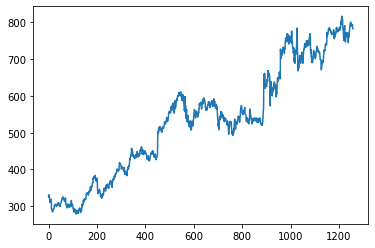

In [10]:
train['Open'].plot()

In [11]:
train=train.iloc[:,1:2].values
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [12]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
train=sc.fit_transform(train)
train

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [13]:
x_train= train[0:1257]
y_train= train[1:1258]

In [14]:
x_train=np.reshape(x_train, (1257 , 1 , 1))

In [15]:
x_train

array([[[0.08581368]],

       [[0.09701243]],

       [[0.09433366]],

       ...,

       [[0.95163331]],

       [[0.95725128]],

       [[0.93796041]]])

In [16]:
x_train.shape

(1257, 1, 1)

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [18]:
model = Sequential()
model.add(LSTM(4, activation= 'sigmoid', input_shape= (None,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=32, epochs=200)

Epoch 1/200
40/40 [==============================] - 2s 2ms/step - loss: 0.4708
Epoch 2/200
40/40 [==============================] - 0s 2ms/step - loss: 0.3597
Epoch 3/200
40/40 [==============================] - 0s 2ms/step - loss: 0.2750
Epoch 4/200
40/40 [==============================] - 0s 2ms/step - loss: 0.2119
Epoch 5/200
40/40 [==============================] - 0s 2ms/step - loss: 0.1654
Epoch 6/200
40/40 [==============================] - 0s 2ms/step - loss: 0.1320
Epoch 7/200
40/40 [==============================] - 0s 2ms/step - loss: 0.1088
Epoch 8/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0927
Epoch 9/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0822
Epoch 10/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0752
Epoch 11/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0708
Epoch 12/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0680
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 2ms/step - loss: 5.8882e-04
Epoch 102/200
40/40 [==============================] - 0s 2ms/step - loss: 5.8335e-04
Epoch 103/200
40/40 [==============================] - 0s 2ms/step - loss: 5.7792e-04
Epoch 104/200
40/40 [==============================] - 0s 2ms/step - loss: 5.7269e-04
Epoch 105/200
40/40 [==============================] - 0s 2ms/step - loss: 5.6818e-04
Epoch 106/200
40/40 [==============================] - 0s 2ms/step - loss: 5.6180e-04
Epoch 107/200
40/40 [==============================] - 0s 2ms/step - loss: 5.5734e-04
Epoch 108/200
40/40 [==============================] - 0s 2ms/step - loss: 5.5263e-04
Epoch 109/200
40/40 [==============================] - 0s 2ms/step - loss: 5.4948e-04
Epoch 110/200
40/40 [==============================] - 0s 2ms/step - loss: 5.4241e-04
Epoch 111/200
40/40 [==============================] - 0s 2ms/step - loss: 5.3805e-04
Epoch 112/200
40/40 [==============================] - 0s 2ms/step -

40/40 [==============================] - 0s 2ms/step - loss: 2.8035e-04
Epoch 197/200
40/40 [==============================] - 0s 2ms/step - loss: 2.8110e-04
Epoch 198/200
40/40 [==============================] - 0s 2ms/step - loss: 2.8118e-04
Epoch 199/200
40/40 [==============================] - 0s 2ms/step - loss: 2.7860e-04
Epoch 200/200
40/40 [==============================] - 0s 2ms/step - loss: 2.7920e-04


In [20]:
# testset
test_set = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test_set.iloc[:,1:2].values

In [21]:
real_stock_price.shape

(20, 1)

In [23]:
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (20 , 1, 1))

In [24]:
prediction = model.predict(inputs)
prediction = sc.inverse_transform(prediction)

1/1 [==============================] - 0s 192ms/step


In [25]:
prediction

array([[771.2423 ],
       [779.019  ],
       [777.17456],
       [784.555  ],
       [793.3448 ],
       [794.48315],
       [792.2502 ],
       [793.9222 ],
       [794.1872 ],
       [793.8753 ],
       [792.88385],
       [792.3441 ],
       [793.74286],
       [794.0079 ],
       [805.57056],
       [811.0718 ],
       [817.13116],
       [814.84955],
       [799.74316],
       [785.8288 ]], dtype=float32)

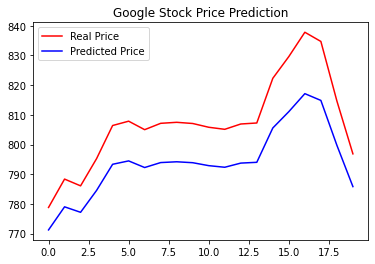

In [26]:
plt.plot( real_stock_price , color = 'red' , label = 'Real Price')
plt.plot( prediction , color = 'blue' , label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.legend()